# Moving Average Simulation MA(q) 

$$
  X_{t} = \beta_{0}Z_{t} + \beta_{1}Z_{t-1} + ... + \beta_{q}Z_{t-q}
$$ 

Moving Average process of order q

In the context of a Moving Average (MA) process of order q, the autocorrelation refers to the correlation between observations at different lags. When we say that the autocorrelation is not significant anymore after order q, it means that the autocorrelation values beyond lag q are not statistically different from zero.

In an MA(q) process, the current observation is a linear combination of the current and past white noise error terms (random shocks) and possibly a constant term. The order q specifies how many past error terms are included in the model.

Typically, in time series analysis, autocorrelation functions (ACF) and partial autocorrelation functions (PACF) are used to examine the relationship between observations at different lags. ACF measures the correlation between observations at different lags, while PACF measures the correlation between observations at different lags while controlling for the effects of intermediate lags.

In an MA(q) process, the ACF will have significant values up to lag q and will be effectively zero for lags beyond q. This means that the correlation between observations becomes negligible after lag q. The PACF, on the other hand, will decay gradually without any sharp cutoff.

When the autocorrelation is not significant beyond order q, it implies that including additional lagged terms in the MA model beyond q is not necessary, as they do not contribute significantly to explaining the relationship between observations. This observation can be used to determine the appropriate order of an MA model when fitting it to a given time series data.

## "Not statistically different from zero."
When we say that a value is "not statistically different from zero," it means that the value is likely to have occurred by chance alone and that there is no strong evidence of a real or meaningful difference between the value and zero.

In statistical analysis, we often compare observed values to a null hypothesis, which assumes that there is no effect or difference. If a value is not statistically different from zero, it suggests that the observed value is likely to have occurred even if the null hypothesis were true. In other words, the value does not provide strong evidence to reject the idea that there is no relationship or effect.

To determine whether a value is statistically different from zero, we typically perform a statistical test that calculates the probability (p-value) of obtaining such a value under the assumption of the null hypothesis. If the p-value is above a certain threshold (often 0.05), we fail to reject the null hypothesis and conclude that the value is not statistically different from zero.

So, when we say that the autocorrelation is not statistically different from zero after order q in a Moving Average process, it means that the correlation values beyond lag q are likely to be small and can be attributed to random chance rather than a meaningful relationship between the observations.

## ACF vs PACF

In time series analysis, autocorrelation functions (ACF) and partial autocorrelation functions (PACF) are used to assess the correlation between observations at different lags. The ACF measures the correlation between observations at different lags without considering the influence of other lags. On the other hand, the PACF measures the correlation between observations at different lags while accounting for the effects of intermediate lags.

By controlling for the effects of intermediate lags, the PACF helps isolate the correlation between observations at a specific lag, removing the influence of the correlations at the intermediate lags. This allows us to better understand the direct relationship between the current observation and the specific lag being analyzed.

In summary, intermediate lags refer to the lags between the current observation and the lag of interest, and controlling for the effects of intermediate lags means considering and accounting for the potential correlations introduced by these intermediate lags when examining the autocorrelation at a specific lag.

In [4]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [5]:
plt.rcParams['figure.figsize'] = (10, 7.5)

# Simulating MA(2) Process

$ y_t = 0.9Z_{t-1} + 0.3Z_{t-2} $

In [6]:
# Containing the coefficients for the MA process
ma2 = np.array([1, 0.9, 0.3])
ar2 = np.array([1, 0, 0]) # No Autoregressive portion

print(ma2)
print(ar2)

[1.  0.9 0.3]
[1 0 0]


In [7]:
MA2_process = ArmaProcess(ar2, ma2).generate_sample(nsample=1000)

Text(0.5, 1.0, 'Moving Average Process of Order 2')

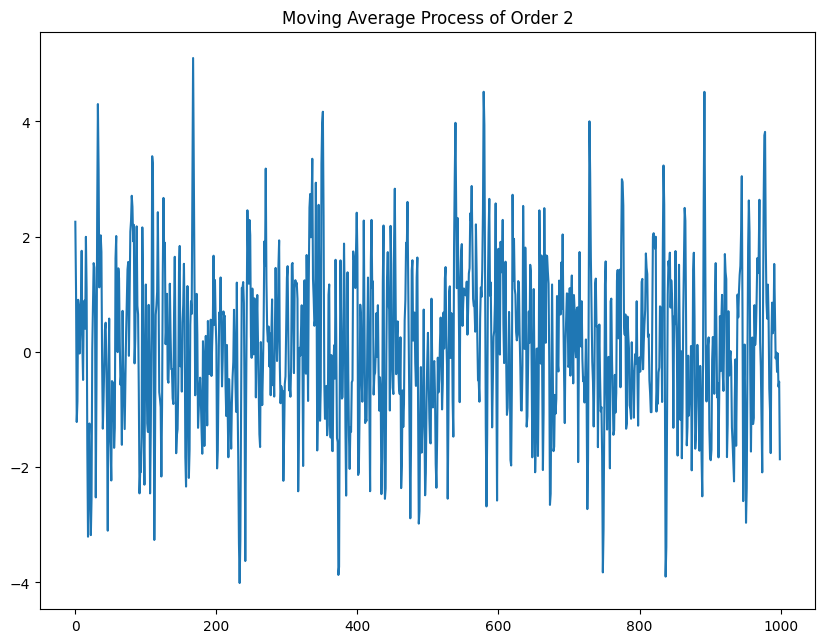

In [8]:
plt.plot(MA2_process)
plt.title('Moving Average Process of Order 2')

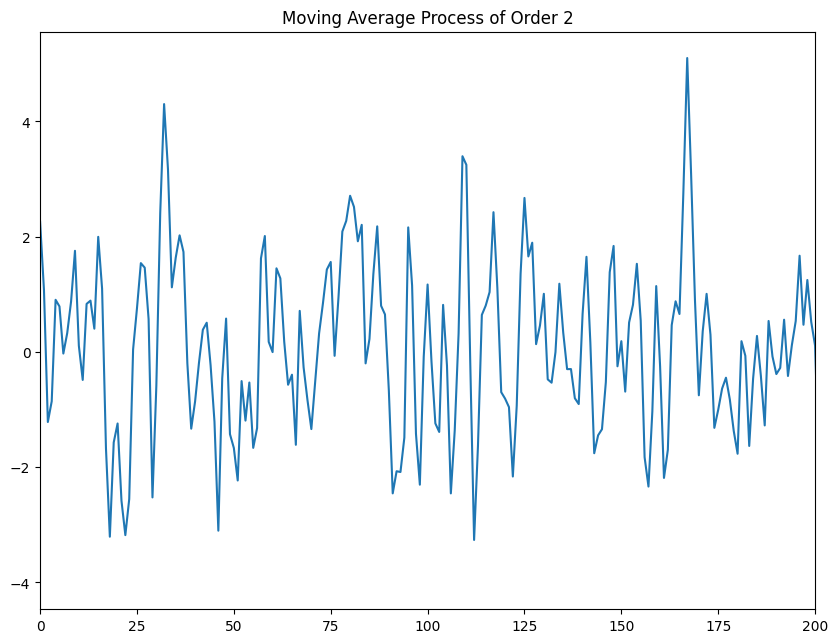

In [9]:
plt.plot(MA2_process)
plt.title('Moving Average Process of Order 2')
plt.xlim(0,200)
plt.show()

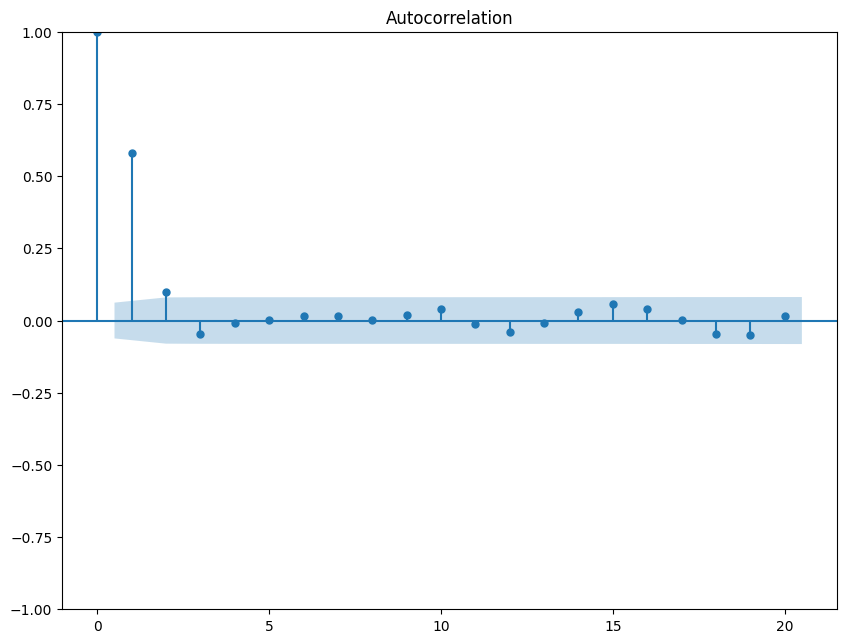

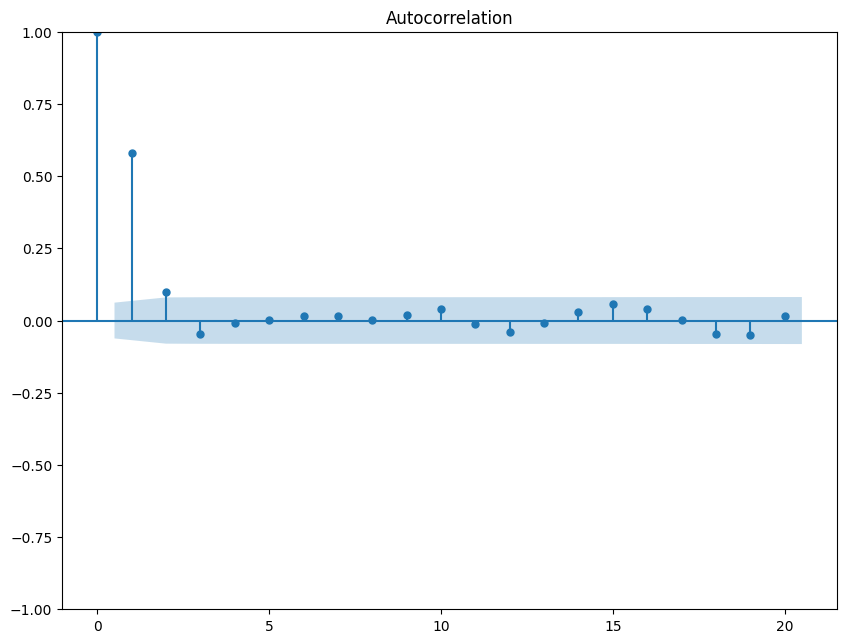

In [10]:
plot_acf(MA2_process, lags=20) 
# This is correct, because we only have a MA process of order 2. 
# Because there is no siginifcant peaks after lag 2

In [11]:
MA_model = ARIMA(MA2_process, order=(0,0,2), enforce_stationarity=False).fit() 
# (0,0,2) ar process = 0, order of differencing = 0, order of MA process = 2 (Value from ACF)
print(MA_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -1465.169
Date:                Tue, 18 Jul 2023   AIC                           2938.339
Time:                        15:36:35   BIC                           2957.958
Sample:                             0   HQIC                          2945.796
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1146      0.073      1.576      0.115      -0.028       0.257
ma.L1          0.8721      0.031     28.585      0.000       0.812       0.932
ma.L2          0.3069      0.030     10.135      0.0

In [ ]:
# Lag1 = 0.8721 and Lag2 = 0.3069 is close to the orignal equation we have. 